<a href="https://colab.research.google.com/github/himayatulmillah/tensorflow-image-classification/blob/main/TensorFlow_Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Name: Himayatul Millah
*   Email: hmillah211@gmail.com
*   Phone: 081336703310
*   Kota: Pasuruan

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-21 07:50:11--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.36MB/s    in 3m 31s  

2021-04-21 07:53:43 (1.46 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile
import os

# Melakukan ekstraksi pada file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
os.listdir(base_dir)

['README_rpc-cv-images.txt', 'rock', 'scissors', 'paper']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Proses augmentasi gambar
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   fill_mode='wrap',
                                   validation_split=0.4) # 40% dari dataset sebagai validation set

In [ ]:
# Menyiapkan data train dan data validation
train_generator = train_datagen.flow_from_directory(base_dir,
                                                    target_size=(150, 150),
                                                    shuffle=True,
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(base_dir,
                                                         target_size=(150, 150),
                                                         subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
# Membuat model sequantial
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
    ])

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='Adamax',
              metrics=['accuracy'])

In [ ]:
# Latih model
model.fit(train_generator,
          steps_per_epoch=25,
          epochs=20,
          validation_data=validation_generator,
          validation_steps=5,
          verbose=2)

Epoch 1/20
25/25 - 43s - loss: 1.1108 - accuracy: 0.3416 - val_loss: 1.0995 - val_accuracy: 0.2875
Epoch 2/20
25/25 - 42s - loss: 1.0332 - accuracy: 0.4805 - val_loss: 0.9146 - val_accuracy: 0.6313
Epoch 3/20
25/25 - 44s - loss: 0.6192 - accuracy: 0.7713 - val_loss: 0.3266 - val_accuracy: 0.9000
Epoch 4/20
25/25 - 42s - loss: 0.3493 - accuracy: 0.8519 - val_loss: 0.2646 - val_accuracy: 0.9187
Epoch 5/20
25/25 - 43s - loss: 0.2853 - accuracy: 0.8975 - val_loss: 0.2370 - val_accuracy: 0.9125
Epoch 6/20
25/25 - 43s - loss: 0.2389 - accuracy: 0.9162 - val_loss: 0.1836 - val_accuracy: 0.9312
Epoch 7/20
25/25 - 43s - loss: 0.1791 - accuracy: 0.9325 - val_loss: 0.1728 - val_accuracy: 0.9625
Epoch 8/20
25/25 - 42s - loss: 0.1742 - accuracy: 0.9338 - val_loss: 0.2119 - val_accuracy: 0.9438
Epoch 9/20
25/25 - 42s - loss: 0.1186 - accuracy: 0.9623 - val_loss: 0.2472 - val_accuracy: 0.9375
Epoch 10/20
25/25 - 43s - loss: 0.1587 - accuracy: 0.9481 - val_loss: 0.2076 - val_accuracy: 0.9250
Epoch 11/

Saving WhatsApp Image 2021-04-21 at 17.21.01-removebg-preview.jpg to WhatsApp Image 2021-04-21 at 17.21.01-removebg-preview (2).jpg
WhatsApp Image 2021-04-21 at 17.21.01-removebg-preview.jpg
[[0. 0. 1.]]
scissor


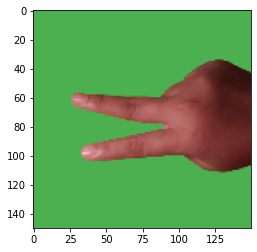

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpig
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # Memprediksi gambar
  path = fn
  img = image.load_img(path,target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  print(classes)
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissor')

## References


1. https://keras.io/api/preprocessing/image/
2. https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
3. https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/
4. https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0197-0
5. https://neptune.ai/blog/keras-loss-functions
6. https://analyticsindiamag.com/guide-to-tensorflow-keras-optimizers/
